# IPL Match Result Analysis & Prediction using ML

In [10]:
##importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
##loading the csv files into dataframes
match_df = pd.read_csv("./ipl_data/IPL Matches 2008-2020.csv")
dlvr_df = pd.read_csv("./ipl_data/IPL Ball-by-Ball 2008-2020.csv")
match_df.sample(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
416,729315,Abu Dhabi,2014-04-29,JP Faulkner,Sheikh Zayed Stadium,1,Kolkata Knight Riders,Rajasthan Royals,Rajasthan Royals,bat,Rajasthan Royals,tie,NaN,Y,NaN,Aleem Dar,AK Chaudhary
799,1216535,Dubai,2020-10-31,Ishan Kishan,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,9.0,N,NaN,YC Barde,PR Reiffel
194,501218,Mumbai,2011-04-20,MM Patel,Wankhede Stadium,0,Mumbai Indians,Pune Warriors,Pune Warriors,bat,Mumbai Indians,wickets,7.0,N,NaN,Asad Rauf,AM Saheba
531,980929,Rajkot,2016-04-21,B Kumar,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,10.0,N,NaN,K Bharatan,HDPK Dharmasena
609,1082624,Pune,2017-04-29,LH Ferguson,Maharashtra Cricket Association Stadium,0,Rising Pune Supergiant,Royal Challengers Bangalore,Royal Challengers Bangalore,field,Rising Pune Supergiant,runs,61.0,N,NaN,KN Ananthapadmanabhan,M Erasmus
250,548308,Mumbai,2012-04-06,SPD Smith,Wankhede Stadium,0,Mumbai Indians,Pune Warriors,Mumbai Indians,field,Pune Warriors,runs,28.0,N,NaN,AK Chaudhary,SJA Taufel
430,733995,Mumbai,2014-05-10,DR Smith,Wankhede Stadium,0,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,4.0,N,NaN,HDPK Dharmasena,VA Kulkarni
803,1216539,Dubai,2020-09-25,PP Shaw,Dubai International Cricket Stadium,0,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Delhi Capitals,runs,44.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth
153,419144,Kolkata,2010-04-07,SC Ganguly,Eden Gardens,0,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,14.0,N,NaN,BG Jerling,RE Koertzen
84,392209,East London,2009-05-04,MS Dhoni,Buffalo Park,1,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,Chennai Super Kings,runs,78.0,N,NaN,BR Doctrove,M Erasmus


In [3]:
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               816 non-null    int64  
 1   city             803 non-null    object 
 2   date             816 non-null    object 
 3   player_of_match  812 non-null    object 
 4   venue            816 non-null    object 
 5   neutral_venue    816 non-null    int64  
 6   team1            816 non-null    object 
 7   team2            816 non-null    object 
 8   toss_winner      816 non-null    object 
 9   toss_decision    816 non-null    object 
 10  winner           812 non-null    object 
 11  result           812 non-null    object 
 12  result_margin    799 non-null    float64
 13  eliminator       812 non-null    object 
 14  method           19 non-null     object 
 15  umpire1          816 non-null    object 
 16  umpire2          816 non-null    object 
dtypes: float64(1), i

In [4]:
dlvr_df.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
dlvr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193468 entries, 0 to 193467
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                193468 non-null  int64 
 1   inning            193468 non-null  int64 
 2   over              193468 non-null  int64 
 3   ball              193468 non-null  int64 
 4   batsman           193468 non-null  object
 5   non_striker       193468 non-null  object
 6   bowler            193468 non-null  object
 7   batsman_runs      193468 non-null  int64 
 8   extra_runs        193468 non-null  int64 
 9   total_runs        193468 non-null  int64 
 10  non_boundary      193468 non-null  int64 
 11  is_wicket         193468 non-null  int64 
 12  dismissal_kind    9495 non-null    object
 13  player_dismissed  9495 non-null    object
 14  fielder           6784 non-null    object
 15  extras_type       10233 non-null   object
 16  batting_team      193468 non-null  obj

## Most wins by an IPL team

<AxesSubplot:>

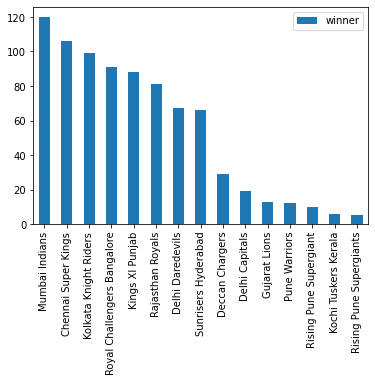

In [8]:
match_wins = pd.DataFrame(match_df['winner'].value_counts())
match_wins.plot(kind="bar")

## Top 10 batsmen

In [11]:
## calculate the total runs scored by each batsman
batsmen = dlvr_df.groupby('batsman').apply(lambda x:np.abssum(x['batsman_runs'])).reset_index(name="runs")

##sort the values and limit it to top 10
top_batsmen = batsmen.sort_values(by='runs', ascending=False)[:10]

top_batsmen

,batsman,runs
505,V Kohli,5878
438,SK Raina,5368
116,DA Warner,5254
379,RG Sharma,5230
407,S Dhawan,5197
24,AB de Villiers,4849
96,CH Gayle,4772
301,MS Dhoni,4632
398,RV Uthappa,4607
154,G Gambhir,4217


Text(0.5, 1.0, 'Top 10 Batsmen in IPL')

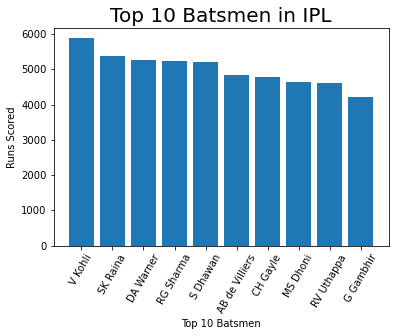

In [12]:
##plotting the batsmen and the runs scored by them
plt.bar(top_batsmen['batsman'], top_batsmen['runs'])
plt.xticks(rotation=60)
plt.xlabel('Top 10 Batsmen',size=10)
plt.ylabel('Runs Scored',size=10)
plt.title('Top 10 Batsmen in IPL',size=20)
